## Fault Detection with VAR Models

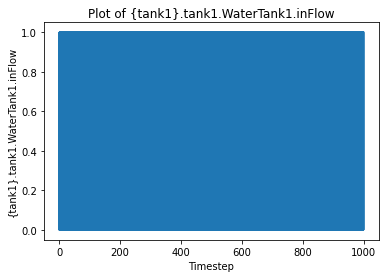

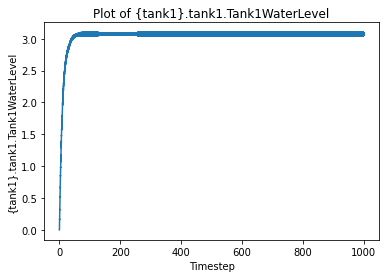

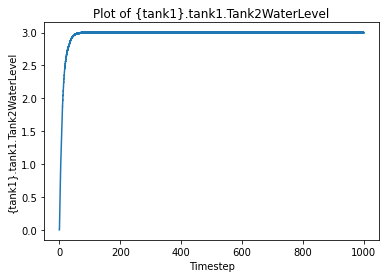

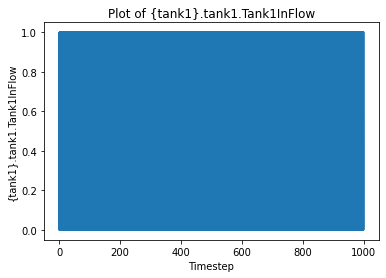

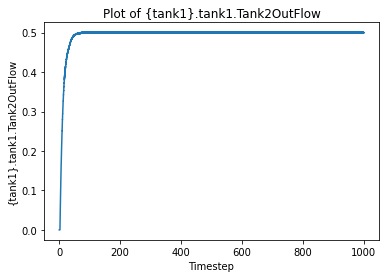

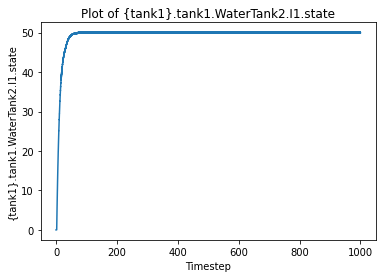

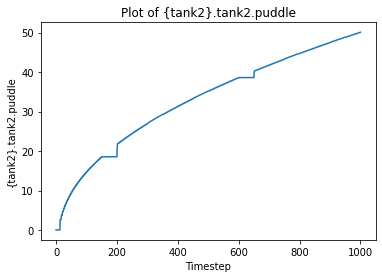

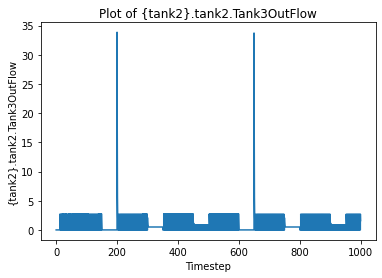

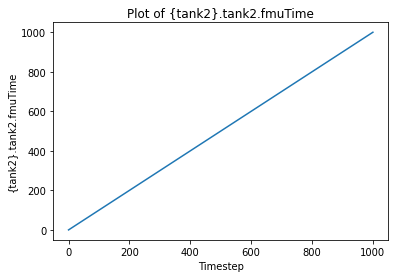

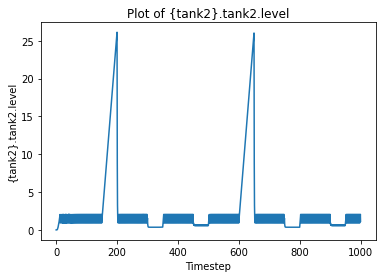

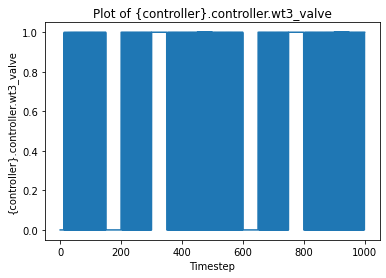

In [15]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = read_csv('test_series.csv', header=0, index_col=0)
attr = list(pd.read_csv("test_series.csv").columns.values)[1:]
for i in range(len(attr)):
    title = "Plot of "+str(attr[i])
    actual = df.iloc[:,i]
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel(attr[i])
    plt.plot(actual)
    plt.show()

### Normalisation of the golden dataset
##### This is to obtain the mean and standard deviation that would be used for normalising all the datasets

In [16]:
def normalise_timeseries(data):
    # Calculate the mean and standard deviation for each feature
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    
    # Normalise each feature using standard deviation
    normalised_data = (data - means) / stds
    return pd.DataFrame(normalised_data)



def denormalise_timeseries(data, means, stds):
    denormalised_data = (data * stds) + means
    return pd.DataFrame(denormalised_data)



normalised_data = normalise_timeseries(df)

In [17]:
testData = normalised_data
testData

,{tank1}.tank1.WaterTank1.inFlow,{tank1}.tank1.Tank1WaterLevel,{tank1}.tank1.Tank2WaterLevel,{tank1}.tank1.Tank1InFlow,{tank1}.tank1.Tank2OutFlow,{tank1}.tank1.WaterTank2.I1.state,{tank2}.tank2.puddle,{tank2}.tank2.Tank3OutFlow,{tank2}.tank2.fmuTime,{tank2}.tank2.level,{controller}.controller.wt3_valve
time,,,,,,,,,,,
0.00,-1.001251,-13.751169,-13.647795,-1.001251,-11.718138,-11.718138,-2.630905,-0.399607,-1.731993,-0.564448,-0.699801
0.05,-1.001251,-13.751171,-13.647793,-1.001251,-11.718138,-11.718138,-2.630905,-0.399607,-1.731785,-0.564448,-0.699801
0.10,0.998751,-13.736104,-13.647793,0.998751,-11.718138,-11.718138,-2.630905,-0.399607,-1.731647,-0.564448,-0.699801
0.15,0.998751,-13.504895,-13.607095,0.998751,-11.718138,-11.718138,-2.630905,-0.399607,-1.731439,-0.564448,-0.699801
0.20,-1.001251,-13.402350,-13.512143,-1.001251,-11.718138,-11.718138,-2.630905,-0.399607,-1.731231,-0.564448,-0.699801
...,...,...,...,...,...,...,...,...,...,...,...
999.80,0.998751,0.165423,0.123577,0.998751,0.126510,0.126510,1.389939,1.245761,1.731281,-0.249446,1.428978
999.85,0.998751,0.239056,0.140814,0.998751,0.133595,0.133595,1.390251,1.179017,1.731420,-0.262224,1.428978
999.90,-1.001251,0.175745,0.174565,-1.001251,0.169767,0.169767,1.390697,1.085672,1.731627,-0.280094,1.428978


In [ ]:
# Train Test Split
nobs = 3000
# train = df[:-nobs]
train = df.iloc[:-nobs]
test = df.iloc[-nobs:]
len(train), len(test)

In [ ]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
# mydata = read_csv('test_fault.csv', header=0, index_col=0)
mydata = read_csv('no_fault.csv', header=0, index_col=0)
attr = list(pd.read_csv("no_fault.csv").columns.values)[1:]
for i in range(len(attr)):
    title = "Plot of "+str(attr[i])
#     actual = mydata.iloc[:400,i]
    actual = mydata.iloc[:,i]
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel(attr[i])
#     plt.plot(actual, label="original")
    plt.plot(actual)
#     plt.legend()
    plt.show()